In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import matplotlib
import random as rd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math

In [2]:
import itertools as it

In [3]:
def count_permutationlist(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(len(df)-d+1):
        slice_df = df[i:i+d]
        sort_slice = sorted(slice_df)
        for j in range(d):
            slice_df[slice_df.index(sort_slice[j])] = j
        count_p[perm.index(tuple(slice_df))] += 1
    return count_p
def count_permutation(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(df.size-d+1):
        slice_df = df.copy().iloc[i:i+d]
        sort_slice = slice_df.copy().sort_values()
        for j in range(d):
            #print(slice_df[slice_df==sort_slice.iloc[j]])
            slice_df.replace(slice_df[slice_df==sort_slice.iloc[j]].item(), j, inplace = True)
        count_p[perm.index(tuple(slice_df.tolist()))] += 1
    return count_p

In [4]:
def fun(X, alp: float, beta: float, max_kf: float, trend: float, season: float):
    j = 2
    k = 2
    for i in X[2:]:
        X[i] = (alp * X[i-dt.timedelta(1/24)] + beta * X[i-dt.timedelta(2/24)]) + rd.uniform(-max_kf, max_kf) + trend * j
        if k%(7*24)==0:
            X[i]+=season
        if k%(7*24)==1:
            X[i]-=season
        k+=1
    return X

In [5]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
datelist['29/06/2023 00:00:00'] = 5000.0
datelist['29/06/2023 01:00:00'] = 5015.0

<AxesSubplot:>

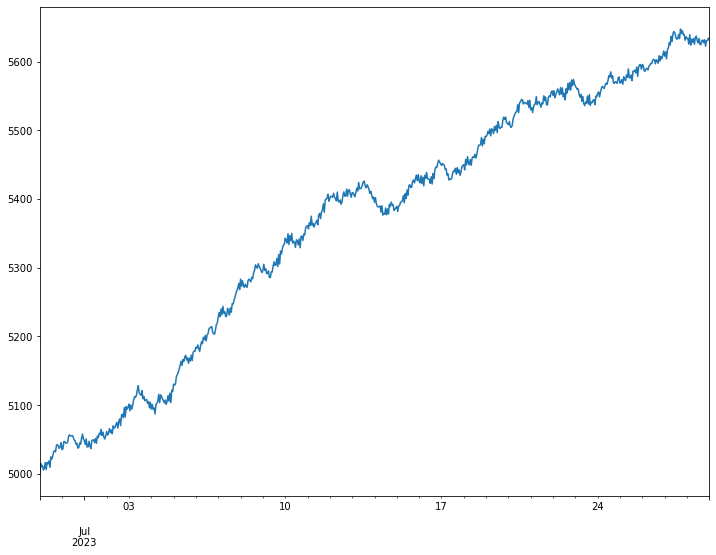

In [6]:
ts = fun(datelist.copy(), 0.4501, 0.5483, 10, 5, 0)
ts.plot(figsize=(12,9))

In [7]:
c = count_permutation(ts.copy(), 2)
c

[393, 327]

In [8]:
clist = count_permutationlist(ts.copy().tolist(), 2)
c

[393, 327]

In [9]:
c1 = count_permutation(ts.copy(), 3)
c1

[148, 121, 160, 124, 84, 82]

In [6]:
def entropy(perm:list):
    allperm = sum(perm)
    ent = 0
    for i in range(len(perm)):
        probability = perm[i]/allperm
        if probability !=0:
            ent -= probability * math.log2(probability)
    return ent

In [11]:
print("max entropy: ", math.log2(2))
entropy(c)


max entropy:  1.0


0.9939301597664729

In [12]:
print("max entropy: ", math.log2(6))
entropy(c1)

max entropy:  2.584962500721156


2.5409128903623026

In [13]:
 for d in range(2,11):
     print("len of slice: ", d)
     c = count_permutation(ts.copy(), d)
     print("max entropy: ", math.log2(math.factorial(d)))
     print(entropy(c))

len of slice:  2
max entropy:  1.0
0.9939301597664729
len of slice:  3
max entropy:  2.584962500721156
2.5409128903623026
len of slice:  4
max entropy:  4.584962500721156
4.432100949487338
len of slice:  5
max entropy:  6.906890595608519
6.470579714088975
len of slice:  6
max entropy:  9.491853096329674
8.122616859969982
len of slice:  7
max entropy:  12.29920801838728
8.986738570901439
len of slice:  8
max entropy:  15.29920801838728
9.332554191930088
len of slice:  9
max entropy:  18.46913301982959
9.42059853642681
len of slice:  10
max entropy:  21.791061114716953
9.447643543325775


In [14]:
ts2 = ts['15/07/2023 00:00:00':]

In [15]:
for d in range(2,11):
    print("len of slice: ", d)
    c = count_permutation(ts2.copy(), d)
    print("max entropy: ", math.log2(math.factorial(d)))
    print(entropy(c))

len of slice:  2
max entropy:  1.0
0.9969052748433813
len of slice:  3
max entropy:  2.584962500721156
2.532126072620226
len of slice:  4
max entropy:  4.584962500721156
4.386974802846552
len of slice:  5
max entropy:  6.906890595608519
6.2678696586000555
len of slice:  6
max entropy:  9.491853096329674
7.565904974017161
len of slice:  7
max entropy:  12.29920801838728
8.11531180253835
len of slice:  8
max entropy:  15.29920801838728
8.293594941518588
len of slice:  9
max entropy:  18.46913301982959
8.343706691668388
len of slice:  10
max entropy:  21.791061114716953
8.345356882666872


721


<AxesSubplot:>

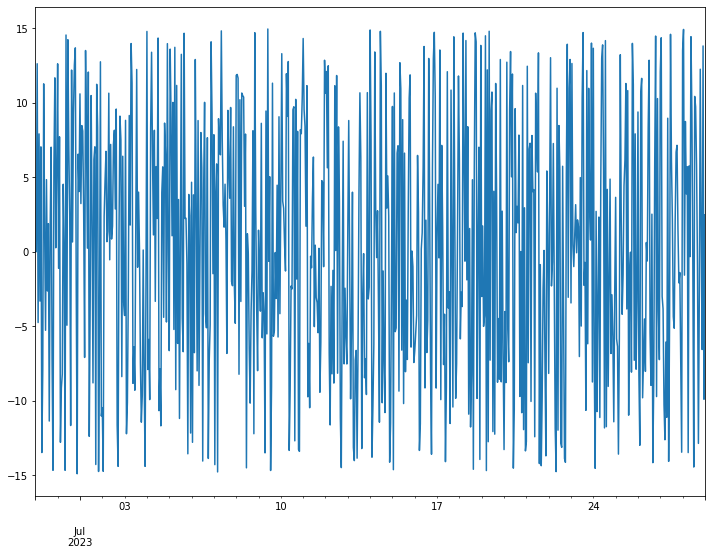

In [16]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
print(datelist.size)
datelist['29/06/2023 00:00:00'] = 0.0
datelist['29/06/2023 01:00:00'] = 0.0
noise = fun(datelist.copy(), 0, 0, 15, 0, 0)

noise.plot(figsize=(12,9))

<AxesSubplot:>

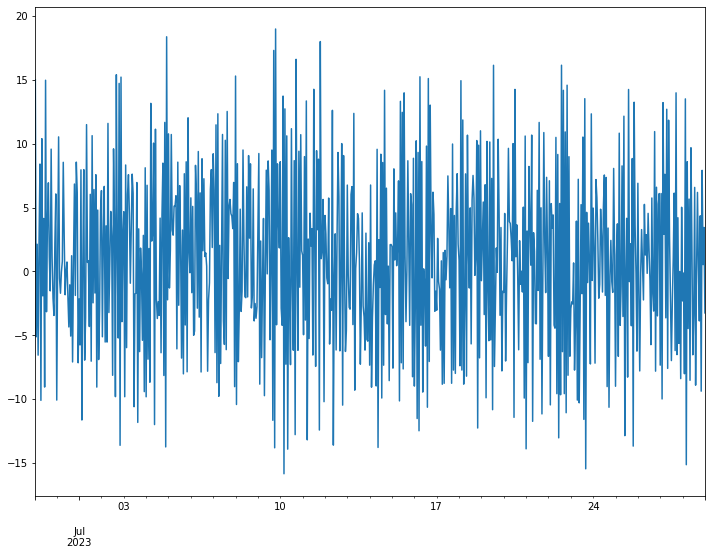

In [17]:
tsdiff = ts.diff(periods=1).dropna()
tsdiff.plot(figsize=(12,9))

In [18]:
for d in range(2,11):
    print("len of slice: ", d)
    c = count_permutationlist(noise.copy().tolist(), d)
    c1 = count_permutation(ts.copy(), d)
    c2 = count_permutation(tsdiff.copy(), d)
    
    print("max entropy: ", math.log2(math.factorial(d)))
    print("noise entropy: ", entropy(c))
    print("ts entropy: ", entropy(c1))
    print("tsdiff entropy: ", entropy(c2))

len of slice:  2
max entropy:  1.0
noise entropy:  0.9999109429180594
ts entropy:  0.9939301597664729
tsdiff entropy:  0.9997641710419596
len of slice:  3
max entropy:  2.584962500721156
noise entropy:  2.583485162566384
ts entropy:  2.5409128903623026
tsdiff entropy:  2.5472952299909446
len of slice:  4
max entropy:  4.584962500721156
noise entropy:  4.571217652106519
ts entropy:  4.432100949487338
tsdiff entropy:  4.377260435974481
len of slice:  5
max entropy:  6.906890595608519
noise entropy:  6.804444049849874
ts entropy:  6.470579714088975
tsdiff entropy:  6.405447914297889
len of slice:  6
max entropy:  9.491853096329674
noise entropy:  8.691931018037943
ts entropy:  8.122616859969982
tsdiff entropy:  8.196437335030684
len of slice:  7
max entropy:  12.29920801838728
noise entropy:  9.348904956129282
ts entropy:  8.986738570901439
tsdiff entropy:  9.125392563081013
len of slice:  8
max entropy:  15.29920801838728
noise entropy:  9.471376902684666
ts entropy:  9.332554191930088
t

Проверим случай, когда тренд сильнее шума

<AxesSubplot:>

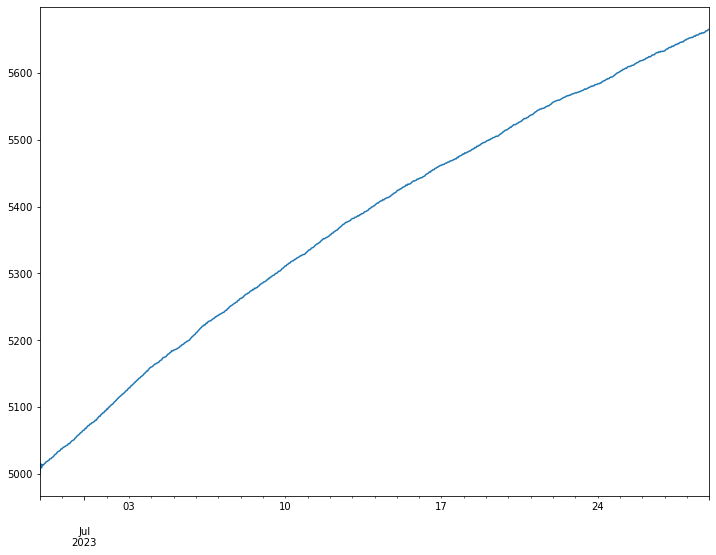

In [19]:
datelist['29/06/2023 00:00:00'] = 5000.0
datelist['29/06/2023 01:00:00'] = 5015.0
second_ts = fun(datelist.copy(), 0.4501, 0.5483, 1, 5, 0)
second_ts.plot(figsize=(12,9))

<AxesSubplot:>

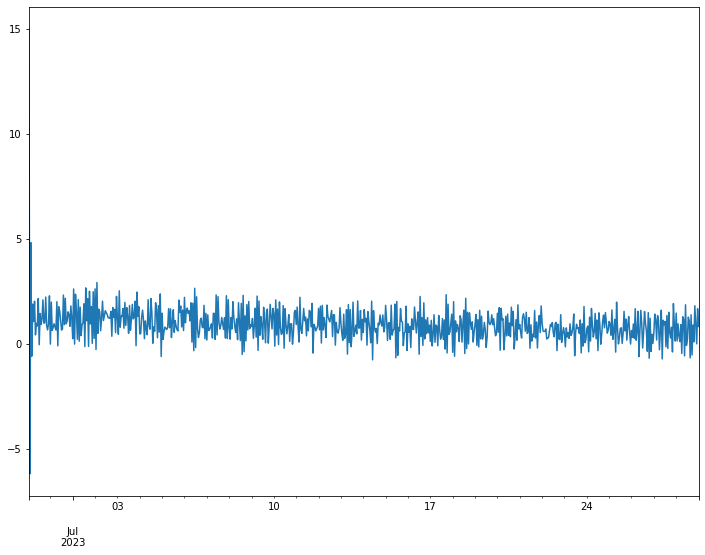

In [20]:
sdiff = second_ts.diff(periods=1).dropna()
sdiff.plot(figsize=(12,9))

<AxesSubplot:>

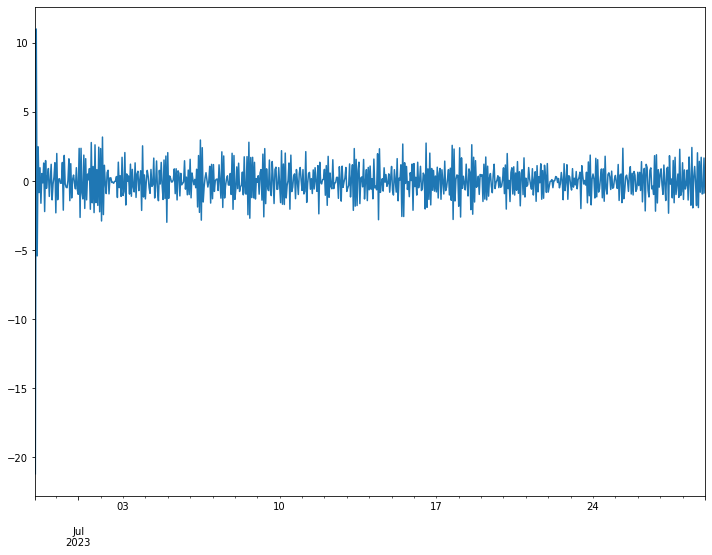

In [21]:
s2diff = sdiff.diff(periods=1).dropna()
s2diff.plot(figsize=(12,9))

In [22]:
for d in range(2,11):
    print("len of slice: ", d)
    c0 = count_permutationlist(noise.copy().tolist(), d)
    c = count_permutation(second_ts.copy(), d)
    c1 = count_permutation(sdiff.copy(), d)
    c2 = count_permutation(s2diff.copy(), d)
    print("max entropy: ", math.log2(math.factorial(d)))
    print("noise entropy: ", entropy(c0))
    print("ts entropy: ",entropy(c))
    print("diff entropy: ",entropy(c1))
    print("diff2 entropy: ",entropy(c2))

len of slice:  2
max entropy:  1.0
noise entropy:  0.9999109429180594
ts entropy:  0.47773959884520556
diff entropy:  0.9999874417092943
diff2 entropy:  0.9967737198009361
len of slice:  3
max entropy:  2.584962500721156
noise entropy:  2.583485162566384
ts entropy:  0.9499288478565903
diff entropy:  2.554394464650433
diff2 entropy:  2.525693180957833
len of slice:  4
max entropy:  4.584962500721156
noise entropy:  4.571217652106519
ts entropy:  1.411223042817397
diff entropy:  4.424217309706775
diff2 entropy:  4.273612196215181
len of slice:  5
max entropy:  6.906890595608519
noise entropy:  6.804444049849874
ts entropy:  1.860452299642793
diff entropy:  6.488861305760578
diff2 entropy:  6.119942395560875
len of slice:  6
max entropy:  9.491853096329674
noise entropy:  8.691931018037943
ts entropy:  2.306424898239617
diff entropy:  8.254830600548642
diff2 entropy:  7.8044655809854415
len of slice:  7
max entropy:  12.29920801838728
noise entropy:  9.348904956129282
ts entropy:  2.7491

Стационарный ряд без тренда. Проверим на прогноз аримой.

721


<AxesSubplot:>

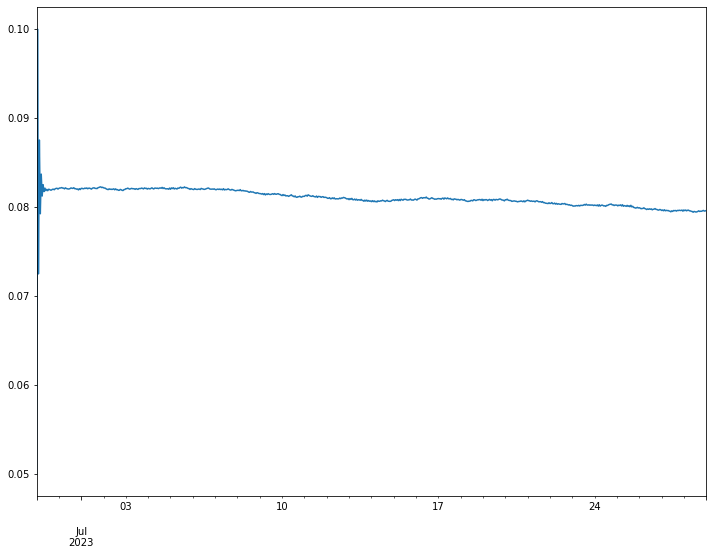

In [16]:
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
print(datelist.size)
datelist['29/06/2023 00:00:00'] = 0.05
datelist['29/06/2023 01:00:00'] = 0.1
stat = fun(datelist.copy(), 0.45, 0.55, 0.0001, 0, 0)

stat.plot(figsize=(12,9))

In [24]:
for d in range(2,11):
    print("len of slice: ", d)
    c1 = count_permutationlist(stat.copy().tolist(), d)
    c = count_permutationlist(noise.copy().tolist(), d)
    
    print("max entropy: ", math.log2(math.factorial(d)))
    print("noise entropy: ", entropy(c))
    print("ts entropy: ", entropy(c1))
    

len of slice:  2
max entropy:  1.0
noise entropy:  0.9999109429180594
ts entropy:  0.9999109429180594
len of slice:  3
max entropy:  2.584962500721156
noise entropy:  2.583485162566384
ts entropy:  2.5724796094612006
len of slice:  4
max entropy:  4.584962500721156
noise entropy:  4.571217652106519
ts entropy:  4.517454790408233
len of slice:  5
max entropy:  6.906890595608519
noise entropy:  6.804444049849874
ts entropy:  6.655008857080332
len of slice:  6
max entropy:  9.491853096329674
noise entropy:  8.691931018037943
ts entropy:  8.447965347570264
len of slice:  7
max entropy:  12.29920801838728
noise entropy:  9.348904956129282
ts entropy:  9.253059746320915
len of slice:  8
max entropy:  15.29920801838728
noise entropy:  9.471376902684666
ts entropy:  9.4395073123455
len of slice:  9
max entropy:  18.46913301982959
noise entropy:  9.47775826644386
ts entropy:  9.47775826644386
len of slice:  10
max entropy:  21.791061114716953
noise entropy:  9.475733430966221
ts entropy:  9.475

<AxesSubplot:>

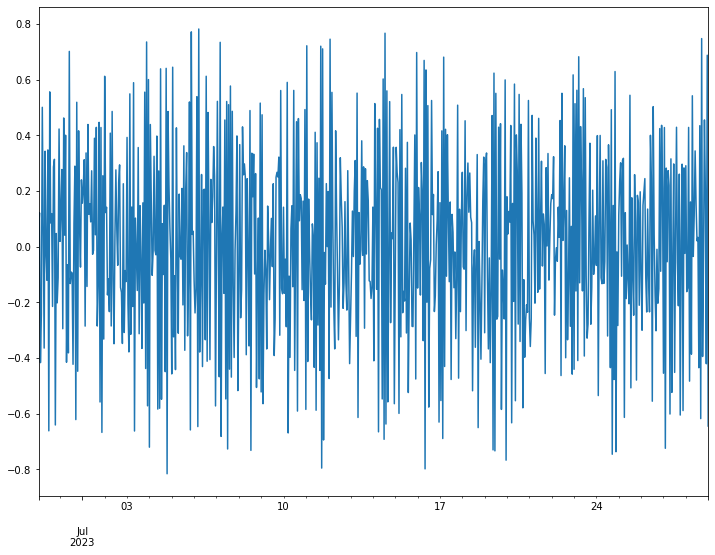

In [25]:
diff = stat.diff(periods=1).dropna()
diff.plot(figsize=(12,9))

In [26]:
test = sm.tsa.adfuller(stat)#ПРОСТО РЯД
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -2.72737135030131
p-value:  0.06942040592231227
Critical values:  {'1%': -3.439477677285233, '5%': -2.865568186630048, '10%': -2.5689150720653977}
есть единичные корни, ряд не стационарен


In [27]:
test = sm.tsa.adfuller(diff)#РЯД ПОСЛЕ ДИФЕРЕНЦИРОВАНИЯ
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -50.814880336197945
p-value:  0.0
Critical values:  {'1%': -3.439477677285233, '5%': -2.865568186630048, '10%': -2.5689150720653977}
единичных корней нет, ряд стационарен


In [28]:
m = diff.index[int(len(stat.index)/2+1)]
r1 = sm.stats.DescrStatsW(stat[m:])
r2 = sm.stats.DescrStatsW(stat[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  1.9132467449864417e-49


In [29]:
m = diff.index[int(len(diff.index)/2+1)]
r1 = sm.stats.DescrStatsW(diff[m:])
r2 = sm.stats.DescrStatsW(diff[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.8642110567443166


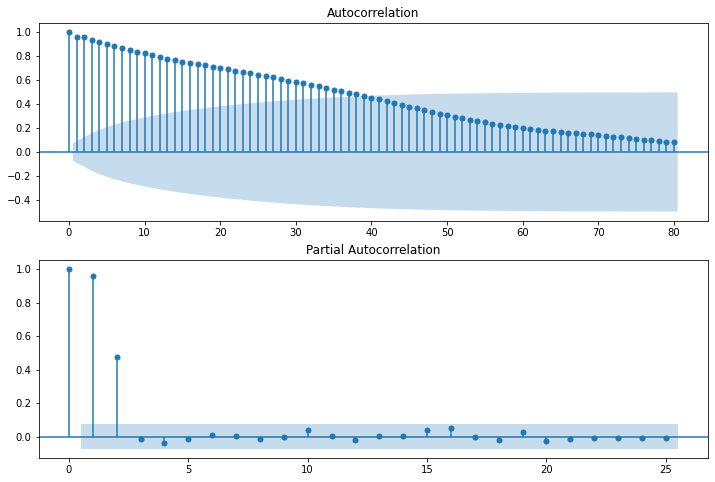

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stat.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stat, lags=25, ax=ax2)

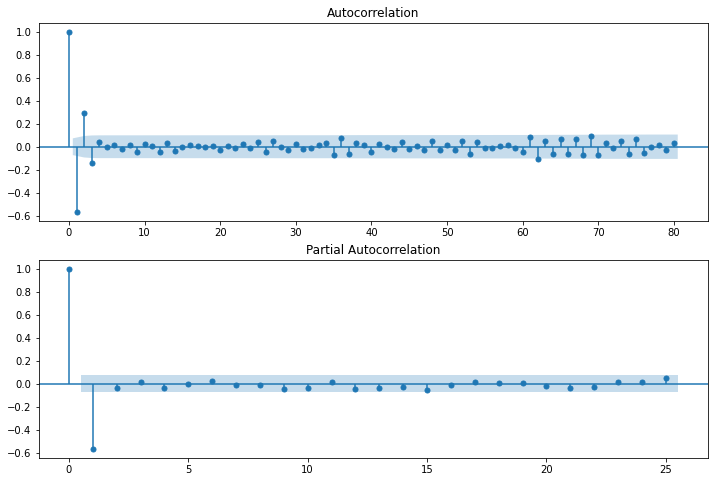

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff, lags=25, ax=ax2)

In [32]:
src_data_model = stat[:'2023-07-17 00:00:00']
src_data_model

2023-06-29 00:00:00        0.05
2023-06-29 01:00:00         0.1
2023-06-29 02:00:00    0.221013
2023-06-29 03:00:00   -0.196184
2023-06-29 04:00:00   -0.439473
                         ...   
2023-07-16 20:00:00    4.653483
2023-07-16 21:00:00     4.74665
2023-07-16 22:00:00    5.015509
2023-07-16 23:00:00     4.38468
2023-07-17 00:00:00     4.54226
Length: 433, dtype: object

In [33]:
model = sm.tsa.ARIMA(src_data_model.astype(float), order=(2,0,3)).fit()
model1 = sm.tsa.ARIMA(src_data_model.astype(float), order=(2,1,3)).fit()

D:\Programs\Anac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  war

D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:>

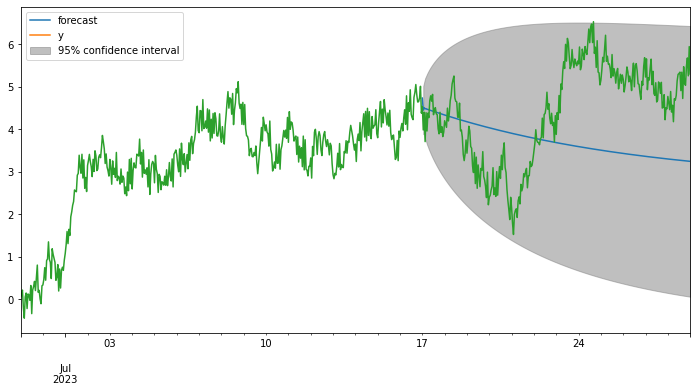

In [34]:
model.plot_predict('2023-07-17 00:00:00','2023-07-29 00:00:00')
stat.plot(figsize=(12,6))

D:\Programs\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:>

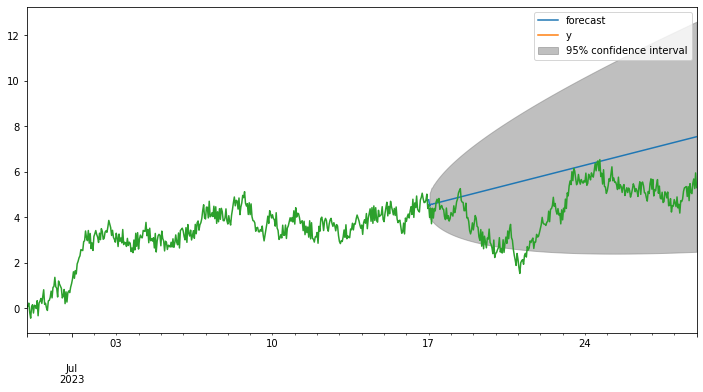

In [35]:
model1.plot_predict('2023-07-17 00:00:00','2023-07-29 00:00:00')
stat.plot(figsize=(12,6))

721


<AxesSubplot:>

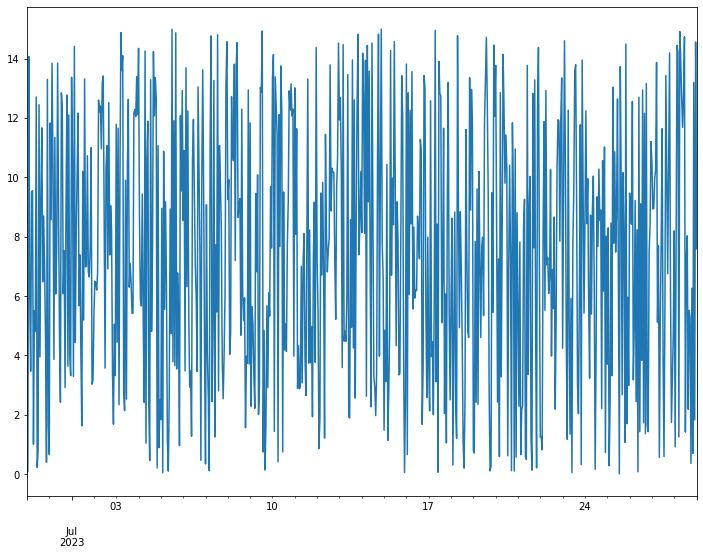

In [36]:
def funnoise(X, alp: float, beta: float, max_kf: float, trend: float, season: float):
    j = 2
    k = 2
    for i in X[2:]:
        X[i] = (alp * X[i-dt.timedelta(1/24)] + beta * X[i-dt.timedelta(2/24)]) + rd.uniform(0, max_kf) + trend * j
        if k%(7*24)==0:
            X[i]+=season
        if k%(7*24)==1:
            X[i]-=season
        k+=1
    return X
datelist = pd.date_range(start='29/06/2023 00:00:00', end='29/07/2023', freq='H').to_series()
datelist.index = datelist
print(datelist.size)
datelist['29/06/2023 00:00:00'] = 0.05
datelist['29/06/2023 01:00:00'] = 0.1
noise = funnoise(datelist.copy(), 0, 0, 15, 0, 0)

noise.plot(figsize=(12,9))

ARIMA для шума

In [37]:
test = sm.tsa.adfuller(noise)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -17.820142560537825
p-value:  3.163456909684008e-30
Critical values:  {'1%': -3.439477677285233, '5%': -2.865568186630048, '10%': -2.5689150720653977}
единичных корней нет, ряд стационарен


In [38]:
m = diff.index[int(len(noise.index)/2+1)]
r1 = sm.stats.DescrStatsW(noise[m:])
r2 = sm.stats.DescrStatsW(noise[:m])
print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.22258742268315312


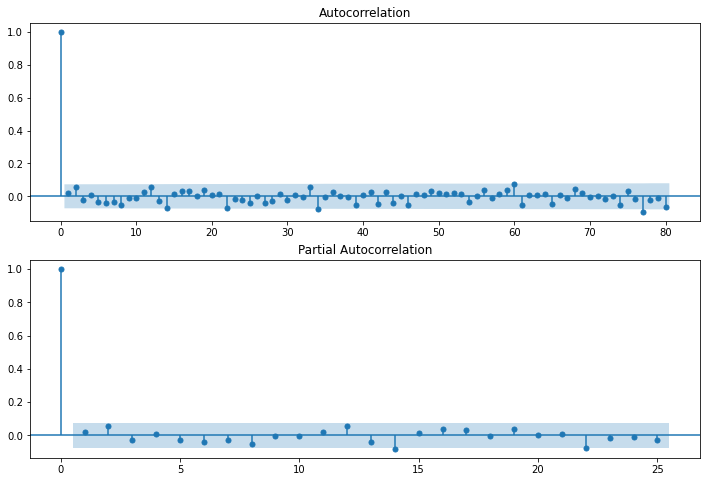

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(noise.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(noise, lags=25, ax=ax2)

Нет автокорреляций, предсказание невозможно

Создадим пересчет перестановок с промежутками

In [53]:
def count_permutation1list(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(len(df)-2*d):
        slice_df = df[i:i+2*d-1]
        for j in range(1,d):
            slice_df.pop(j)
        sort_slice = sorted(slice_df)
        for j in range(d):
            slice_df[slice_df.index(sort_slice[j])] = j
        count_p[perm.index(tuple(slice_df))] += 1
    return count_p
def count_permutation1(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(df.size-2*d):
        slice_df = df.copy().iloc[i:i+2*d-1]
        for j in range(1,d):
            slice_df.pop(j)
        sort_slice = slice_df.copy().sort_values()
        for j in range(d):
            #print(slice_df[slice_df==sort_slice.iloc[j]])
            slice_df.replace(slice_df[slice_df==sort_slice.iloc[j]].item(), j, inplace = True)
        count_p[perm.index(tuple(slice_df.tolist()))] += 1
    return count_p

In [56]:
for d in range(2,11):
    print("len of slice: ", d)
    c0 = count_permutation1list(noise.copy().tolist(), d)
    c = count_permutation1list(ts.copy().tolist(), d)
    c1 = count_permutation1list(tsdiff.copy().tolist(), d)
    print("max entropy: ", math.log2(math.factorial(d)))
    print("noise entropy: ", entropy(c0))
    print("ts entropy: ",entropy(c))
    print("diff entropy: ",entropy(c1))

len of slice:  2
max entropy:  1.0
noise entropy:  0.9995944496575893
ts entropy:  0.9735015109860323
diff entropy:  0.999859287519586
len of slice:  3
max entropy:  2.584962500721156
noise entropy:  2.582013880241771
ts entropy:  2.4284479268266495
diff entropy:  2.570758249123236
len of slice:  4
max entropy:  4.584962500721156
noise entropy:  4.557057684473618
ts entropy:  4.147467638261911
diff entropy:  4.518789066529424
len of slice:  5
max entropy:  6.906890595608519
noise entropy:  6.771024588285131
ts entropy:  5.96048117400053
diff entropy:  6.683520902251799
len of slice:  6
max entropy:  9.491853096329674
noise entropy:  8.652217633145282
ts entropy:  7.487132555036832
diff entropy:  8.481826534591827
len of slice:  7
max entropy:  12.29920801838728
noise entropy:  9.325884810039584
ts entropy:  8.433648284850948
diff entropy:  9.251379277646834
len of slice:  8
max entropy:  15.29920801838728
noise entropy:  9.45296880898828
ts entropy:  8.981258366506454
diff entropy:  9.

Ситуация улучшилась, но недостаточно. Попробуем увеличить промежуток.

In [60]:
def count_permutation2list(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(len(df)-3*d):
        slice_df = df[i:i+3*d-2]
        for j in range(1,d):
            slice_df.pop(j)
            slice_df.pop(j)
        sort_slice = sorted(slice_df)
        for j in range(d):
            slice_df[slice_df.index(sort_slice[j])] = j
        count_p[perm.index(tuple(slice_df))] += 1
    return count_p
def count_permutation1(df, d):
    r = list(range(d))
    perm = list(it.permutations(r))
    count_p = [0]*len(perm)
    for i in range(df.size-2*d):
        slice_df = df.copy().iloc[i:i+2*d-1]
        for j in range(1,d):
            slice_df.pop(j)
        sort_slice = slice_df.copy().sort_values()
        for j in range(d):
            #print(slice_df[slice_df==sort_slice.iloc[j]])
            slice_df.replace(slice_df[slice_df==sort_slice.iloc[j]].item(), j, inplace = True)
        count_p[perm.index(tuple(slice_df.tolist()))] += 1
    return count_p

In [61]:
for d in range(2,11):
    print("len of slice: ", d)
    c0 = count_permutation2list(noise.copy().tolist(), d)
    c = count_permutation2list(ts.copy().tolist(), d)
    c1 = count_permutation2list(tsdiff.copy().tolist(), d)
    print("max entropy: ", math.log2(math.factorial(d)))
    print("noise entropy: ", entropy(c0))
    print("ts entropy: ",entropy(c))
    print("diff entropy: ",entropy(c1))

len of slice:  2
max entropy:  1.0
noise entropy:  0.9998292601233936
ts entropy:  0.9684432307482118
diff entropy:  1.0
len of slice:  3
max entropy:  2.584962500721156
noise entropy:  2.5838530386576606
ts entropy:  2.424422461276537
diff entropy:  2.5837801731074084
len of slice:  4
max entropy:  4.584962500721156
noise entropy:  4.577247811849534
ts entropy:  4.114621620128844
diff entropy:  4.573601885213428
len of slice:  5
max entropy:  6.906890595608519
noise entropy:  6.800328309510398
ts entropy:  5.874475297750103
diff entropy:  6.808635133898597
len of slice:  6
max entropy:  9.491853096329674
noise entropy:  8.668070130818743
ts entropy:  7.3169644433109955
diff entropy:  8.706836319187259
len of slice:  7
max entropy:  12.29920801838728
noise entropy:  9.335846986829283
ts entropy:  8.294675214786508
diff entropy:  9.338261985855793
len of slice:  8
max entropy:  15.29920801838728
noise entropy:  9.439275964950289
ts entropy:  8.90656496682893
diff entropy:  9.44006993263

Ничего не дает(